# Frequentist vs Bayesian Statistics: a Practical Introduction to Parameter Estimation with Python

### Parameter estimation is a critical component of statistical inference, data science, and machine learning workflows. Though this topic can be complex, we offer an introduction to the process comparing two approaches with some theory and some code.

In [1]:
%%capture
#Install Plotly
# !pip install plotly

A parameter is a variable that governs the relationship between an input variable (sometimes also called a predictor or an independent variable) and an output variable (also know as an outcome or a dependent variable). We rarely have complete information, and thus we are forced to come up with ways in which we can understand the relationship between the information we do have access to (our predictor variables) and the information we are trying to predict (our outcome variable).

Although the true value of the parameter is inherently unknowable, we can work with their approximations and in this blog post, we're going to look at two different approaches to doing so. We'll start with the Frequentist -  or Classical approach- using Maximum Likelihood Estimation (MLE) before moving on to the Bayesian framework for parameter estimation. Our intention is not to argue in favor of one approach or another, but rather to explain the difference in workflows and begin a more general discussion around statistical inference and what we are trying to accomplish as statistical practitioners.

## The Binominal Distribution
We'll center this discussion around the example of a coin-flip (as is mandatory of any statistics text). Specifically, we are interested in accurately predicting how often a coin will come up heads, or the probability that a coin will come up heads in a given flip. In this case, the outcome of our coin-flip is our random variable and it can take on the value of 0 (Tails) or 1 (Heads).
The outcome of a single coin-flip then can be modeled as a Bernoulli process where Y  is the outcome of an individual coin flip with two potential values, heads or tails. Formally, we have:

$Y_{i}\sim Bernoulli(p)$

In this context, p is the probability of the coin coming up heads, and this is our parameter of interest. Our task will be to estimate p as precisely as possible.
As such, we have:

$P(\text{Y = 1 or Heads}) = p$

$P(\text{Y=0 or Tails}) = 1-p$

So, given a coin, how would we estimate p? 

For now, we aren't going to give you any additional information about this coin, and we'll discuss later on why this is important. For now though, we'll want to come up with ways in which we can get more information about p, we need to observe some data! In this case, we'll obtain data by, well, flipping the coin. 
We could just flip the coin once but this wouldn't be very informative. Imagine that the truth is that p=0.5 and after one flip we observe a head. 

If we only relied on that one flip for our information, we might conclude that p=1, so that the probability of flipping heads is 100%, and we'd flip heads all the time! In fact this is the answer that the Frequentist approach would give us, but more on that later.
What we'll want to do instead is observe a lot of flips. Suppose that we conduct n independent coin-flips, where each coin-flip is of course a Bernoulli random variable. Of those n flips, the total number of heads, X, is a binomial random variable with parameters n and p (the number of trials, or coin flips and the probability of success, or the probability of tossing heads).
Formally, we have:

$X\sim Binomial(n, p)$

By flipping the coin over and over again, we'll be able to gain more and more information about our parameter of interest, p. 

## Simulating Data
Let's assume we have a biased coin that has a 60% probability of flipping heads, and we want to estimate that probability. We can use the scipy.stats library to draw outcomes from the Binomial distribution.
Simulations are very useful because we can hard-code the "true" parameters, which then allows us compare how different frameworks compare in approximating the parameter.

Let's simulate 10000 coin flips and observe some results.

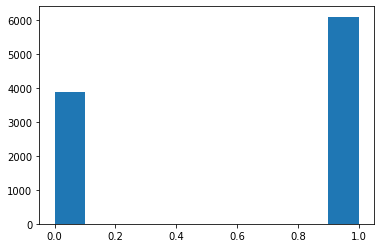

In [2]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
np.random.seed(42) # set seed for reproducibility
# Set the probability of heads = 0.6
p = 0.6
# Flip the Coin 10000 times and observe the results
n_trials = 10000
data = stats.bernoulli.rvs(p, size = n_trials)
# plot results
plt.hist(data);

In [4]:
sum(data)

6108

As expected, the split between heads and tails is close to 60/40, and that's simply because we've coded the parameter that way! 

Now that we have our data, let's compare how the Frequentist and Bayesian approaches obtain the parameter of interest: _p_.

## The Frequentist Approach

Frequentist statistics uses MLE. While a full treatment of MLE is outside the scope of this blog post, its working is in its name: it fits a model that maximizes the likelihood of having observed the observed data.

For the Binomial distribution, the MLE is the sample proportion of success.[1]

$\text{MLE} = \frac{\text{Number of successes}}{\text{Number of trials}}$

As such the standard error is simply the standard deviation scaled by $\sqrt{N}$. 

So S.E. =  $\sqrt{\frac{p*(1-p)}{N}}$

We can find our 95% confidence intervals simply by multiplying the standard error with the 95% Z-stat, which is equal to 1.96.

$\text{S.D.} = \sqrt{p*(1-p)}$

$\text{S.E.} =  \sqrt{\frac{p*(1-p)}{N}}$

$\text{C.I Bounds} = \text{MLE} \pm 1.96*\text{S.E.}$

Let's look at what happens when we toss 10 coins. Since we've already simulated 10000 coin flips above, we can directly use the first 10 flips from the results.

In [5]:
i = 10
results = {}
sample = data[:i]
p_estimated = np.mean(sample)
q_estimated = 1 - p_estimated
standard_error = np.sqrt(p_estimated*q_estimated)/np.sqrt(i)
ci = 1.96*standard_error 
# store results in a dict
results['number_of_heads'] = sample.sum()
results['p_estimated'] = p_estimated
results['q_estimated'] = q_estimated
results['standard_error'] = standard_error
results['low'] = p_estimated - ci
results['high'] = p_estimated + ci

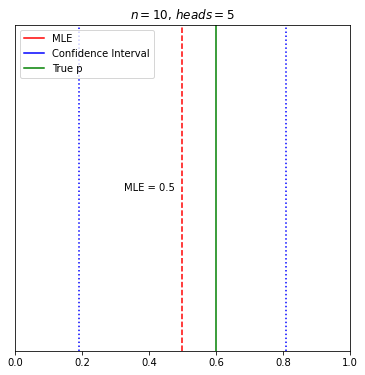

In [9]:
import matplotlib.lines as mlines

fig, axs = plt.subplots(figsize = (6,6))

axs.axvline(results['p_estimated'], color = 'red', linestyle = "dashed")
axs.axvline(0.6, color = 'green', linestyle = "solid")
axs.axvline(results['low'], color = 'blue', linestyle='dotted')
axs.axvline(results['high'], color = 'blue', linestyle='dotted')
axs.get_yaxis().set_visible(False)
axs.title.set_text("$ n = $" + str(i) + ", $heads = $" + str(results['number_of_heads']))
axs.text(results['p_estimated'] - 0.1, 0.5, 'MLE = ' + str(np.round(results['p_estimated'], 2)), 
         horizontalalignment='center', verticalalignment='center', transform=axs.transAxes)

blue_line = mlines.Line2D([], [], color='blue',
                          markersize=15, label='Confidence Interval')
red_line = mlines.Line2D([], [], color='red',
                          markersize=15, label='MLE')
green_line = mlines.Line2D([], [], color='green',
                          markersize=15, label='True p')

axs.legend(handles = [red_line, blue_line, green_line], loc=2);

In [ ]:
fig.savefig('mle1')

Because we have observed 5 heads, the MLE is 0.5 (recall that the true value of p is 0.6). 

The uncertainty is captured by the confidence intervals, which indicate that the true value of p has a 95% probability of being between ~ 0.2 and ~ 0.8. 

Since the confidence intervals are proportional to the sample size, we can expect them to shrink as the number of coin flips increases - the more data we have the more confident we are about our predictions. 

To illustrate that, let's see what happens when we flip increasingly large amounts of coins.